In [1]:
import numpy as np
import pandas as pd 

In [2]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 100)
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
train = pd.read_csv('C:/Users/LENOVO/Downloads/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('C:/Users/LENOVO/Downloads/house-prices-advanced-regression-techniques/test.csv')

In [5]:
from collections import Counter
num_col = train.loc[:,'MSSubClass':'SaleCondition'].select_dtypes(exclude=['object']).columns
# Outlier detection 

def detect_outliers(df,n,features):
   
    outlier_indices = []
    
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers 

Outliers_to_drop = detect_outliers(train,2, num_col)
train.loc[Outliers_to_drop] # Show the outliers rows
# Drop outliers
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [6]:
df = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'], test.loc[:,'MSSubClass':'SaleCondition']))

In [7]:
def basic_details(df):
    b = pd.DataFrame()
    b['Missing value'] = df.isnull().sum()
    b['N unique value'] = df.nunique()
    b['dtype'] = df.dtypes
    return b
basic_details(df)

,Missing value,N unique value,dtype
MSSubClass,0,16,int64
MSZoning,4,5,object
LotFrontage,454,127,float64
LotArea,0,1867,int64
Street,0,2,object
Alley,2598,2,object
LotShape,0,4,object
LandContour,0,4,object
Utilities,2,1,object
LotConfig,0,5,object


In [8]:
scaler = MinMaxScaler((-1,1))

df['BsmtFinSF2_sc'] = scaler.fit_transform(df[['BsmtFinSF2']])
df['BsmtFinSF2_sc'].fillna(0,inplace=True)
df['LowQualFinSF_sc'] = scaler.fit_transform(df[['LowQualFinSF']])
df['WoodDeckSF_sc'] = scaler.fit_transform(df[['WoodDeckSF']])
df['OpenPorchSF_sc'] = scaler.fit_transform(df[['OpenPorchSF']])
df['EnclosedPorch_sc'] = scaler.fit_transform(df[['EnclosedPorch']])
df['3SsnPorch_sc'] = scaler.fit_transform(df[['3SsnPorch']])
df['ScreenPorch_sc'] = scaler.fit_transform(df[['ScreenPorch']])
df['MiscVal_sc'] = scaler.fit_transform(df[['MiscVal']])

df['MSZoning'].fillna('N')
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace = True)
df['Alley'].fillna('N')
df['Exterior1st'].fillna('N')
df['Exterior2nd'].fillna('N')
df['Utilities'].fillna('N')
df['MasVnrType'].fillna('N')
df['BsmtFullBath'].fillna(0)
df['BsmtHalfBath'].fillna(0)
df['FullBath'].fillna(0)
df['HalfBath'].fillna(0)
df['KitchenQual'].fillna('N')

df['Functional'].fillna('N')
df['FireplaceQu'].fillna('N')
df['GarageType'].fillna('N')
df['GarageYrBlt'].fillna(0,inplace=True)
df['GarageFinish'].fillna('N')
df['GarageCars'].fillna(0)
df['GarageArea'].fillna(0,inplace=True)
df['GarageQual'].fillna('N')
df['GarageCond'].fillna('N')
df['BsmtFinSF2'].fillna(0,inplace=True)
df['MasVnrArea'].fillna(0,inplace=True)
df['BsmtFinSF1'].fillna(0,inplace=True)
df['SaleType'].fillna('N')
df['BsmtUnfSF'].fillna(0,inplace=True)
df['TotalBsmtSF'].fillna(0,inplace=True)
df['PoolQC'].fillna('N')
df['Fence'].fillna('N')
df['MiscFeature'].fillna('N')
df['BsmtQual'].fillna('N')
df['BsmtCond'].fillna('N')
df['BsmtExposure'].fillna('N')
df['BsmtFinType1'].fillna('N')
df['BsmtFinType2'].fillna('N')
df['Electrical'].fillna('N')
df["AllSF"] = df["GrLivArea"] + df["TotalBsmtSF"]
df['Area'] = df['LotArea']*df['LotFrontage']

df['Area_log'] = np.log1p(df['Area'])

def Gar_category(cat):
    if cat <= 250:
        return 1
    elif cat <= 500 and cat > 250:
        return 2
    elif cat <= 1000 and cat > 500:
        return 3
    return 4
df['GarageArea_cat'] = df['GarageArea'].apply(Gar_category)

def Low_category(cat):
    if cat <= 1000:
        return 1
    elif cat <= 2000 and cat > 1000:
        return 2
    elif cat <= 3000 and cat > 2000:
        return 3
    return 4
df['GrLivArea_cat'] = df['GrLivArea'].apply(Low_category)

def fl1_category(cat):
    if cat <= 500:
        return 1
    elif cat <= 1000 and cat > 500:
        return 2
    elif cat <= 1500 and cat > 1000:
        return 3
    elif cat <= 2000 and cat > 1500:
        return 4
    return 5
df['1stFlrSF_cat'] = df['1stFlrSF'].apply(fl1_category)
df['2ndFlrSF_cat'] = df['2ndFlrSF'].apply(fl1_category)

def bsmtt_category(cat):
    if cat <= 500:
        return 1
    elif cat <= 1000 and cat > 500:
        return 2
    elif cat <= 1500 and cat > 1000:
        return 3
    elif cat <= 2000 and cat > 1500:
        return 4
    return 5
df['TotalBsmtSF_cat'] = df['TotalBsmtSF'].apply(bsmtt_category)


def bsmt_category(cat):
    if cat <= 500:
        return 1
    elif cat <= 1000 and cat > 500:
        return 2
    elif cat <= 1500 and cat > 1000:
        return 3
    elif cat <= 2000 and cat > 1500:
        return 4
    return 5
df['BsmtUnfSF_cat'] = df['BsmtUnfSF'].apply(bsmt_category)

def lot_category(cat):
    if cat <= 50:
        return 1
    elif cat <= 100 and cat > 50:
        return 2
    elif cat <= 150 and cat > 100:
        return 3
    return 4
df['LotFrontage_cat'] = df['LotFrontage'].apply(lot_category)


def lot_category1(cat):
    if cat <= 5000:
        return 1
    elif cat <= 10000 and cat > 5000:
        return 2
    elif cat <= 15000 and cat > 10000:
        return 3
    elif cat <= 20000 and cat > 15000:
        return 4
    elif cat <= 25000 and cat > 20000:
        return 5
    return 6
df['LotArea_cat'] = df['LotArea'].apply(lot_category1)

def year_category(yb):
    if yb <= 1910:
        return 1
    elif yb <= 1950 and yb > 1910:
        return 2
    elif yb >= 1950 and yb < 1980:
        return 3
    elif yb >= 1980 and yb < 2000:
        return 4
    return 5

df['YearBuilt_cat'] = df['YearBuilt'].apply(year_category) 
df['YearRemodAdd_cat'] = df['YearRemodAdd'].apply(year_category)
df['GarageYrBlt_cat'] = df['GarageYrBlt'].apply(year_category)


def vnr_category(cat):
    if cat <= 250:
        return 1
    elif cat <= 500 and cat > 250:
        return 2
    elif cat <= 750 and cat > 500:
        return 3
    return 4

df['MasVnrArea_cat'] = df['MasVnrArea'].apply(vnr_category)

def allsf_category(yb):
    if yb <= 1000:
        return 1
    elif yb <= 2000 and yb > 1000:
        return 2
    elif yb >= 3000 and yb < 2000:
        return 3
    elif yb >= 4000 and yb < 3000:
        return 4
    elif yb >= 5000 and yb < 4000:
        return 5
    elif yb >= 6000 and yb < 5000:
        return 6
    return 7

df['AllSF_cat'] = df['AllSF'].apply(allsf_category)

dummy_col=['YearRemodAdd', 'YearBuilt', 'AllSF_cat', 'MiscVal','OverallCond', 'OverallQual', 'BsmtFinType2', 'SaleCondition','SaleType', 'YrSold', 'MoSold', 'MiscFeature', 'Fence', 'PoolQC', 'PoolArea', 'PavedDrive', 'GarageCond', 'GarageQual', 'GarageArea_cat', 'GarageCars', 'GarageFinish', 'GarageType', 'FireplaceQu', 'Fireplaces','Functional', 'TotRmsAbvGrd', 'KitchenQual', 'KitchenAbvGr', 'BedroomAbvGr', 'HalfBath', 'FullBath', 'BsmtHalfBath', 'BsmtFullBath','GrLivArea_cat','MSSubClass', 'MSZoning', 'LotFrontage_cat', 'LotArea_cat', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
          'BldgType', 'HouseStyle', 'YearBuilt_cat', 'YearRemodAdd_cat', 'RoofStyle', 'RoofMatl', 'Exterior2nd', 'Exterior1st', 'MasVnrType', 'MasVnrArea_cat', 'ExterQual', 'ExterCond', 'Foundation', 
          'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtUnfSF_cat', 'TotalBsmtSF_cat', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF_cat', '2ndFlrSF_cat']
df = pd.get_dummies(df, columns=dummy_col, drop_first=False)

df['LotFrontage_log'] = np.log1p(df['LotFrontage'])
df['LotArea_log'] = np.log1p(df['LotArea'])
df['BsmtUnfSF_log'] = np.log1p(df['BsmtUnfSF'])

df['Is_MasVnr'] = [1 if i != 0 else 0 for i in df['MasVnrArea']]
df['Is_BsmtFinSF1'] = [1 if i != 0 else 0 for i in df['BsmtFinSF1']]
df['Is_BsmtFinSF2'] = [1 if i != 0 else 0 for i in df['BsmtFinSF2']]
df['Is_BsmtUnfSF'] = [1 if i != 0 else 0 for i in df['BsmtUnfSF']]
df['Is_TotalBsmtSF'] = [1 if i != 0 else 0 for i in df['TotalBsmtSF']]
df['Is_2ndFlrSF'] = [1 if i != 0 else 0 for i in df['2ndFlrSF']]
df['Is_LowQualFinSF'] = [1 if i != 0 else 0 for i in df['LowQualFinSF']]
df['Is_GarageArea'] = [1 if i != 0 else 0 for i in df['GarageArea']]
df['Is_WoodDeckSF'] = [1 if i != 0 else 0 for i in df['WoodDeckSF']]
df['Is_OpenPorchSF'] = [1 if i != 0 else 0 for i in df['OpenPorchSF']]
df['Is_EnclosedPorch'] = [1 if i != 0 else 0 for i in df['EnclosedPorch']]
df['Is_3SsnPorch'] = [1 if i != 0 else 0 for i in df['3SsnPorch']]
df['Is_ScreenPorch'] = [1 if i != 0 else 0 for i in df['ScreenPorch']]

In [9]:
def basic_details(df):
    b = pd.DataFrame()
    b['Missing value'] = df.isnull().sum()
    b['N unique value'] = df.nunique()
    b['dtype'] = df.dtypes
    return b
basic_details(df)

,Missing value,N unique value,dtype
LotFrontage,0,127,float64
LotArea,0,1867,int64
MasVnrArea,0,424,float64
BsmtFinSF1,0,956,float64
BsmtFinSF2,0,248,float64
...,...,...,...
Is_WoodDeckSF,0,2,int64
Is_OpenPorchSF,0,2,int64
Is_EnclosedPorch,0,2,int64
Is_3SsnPorch,0,2,int64


In [10]:
df.shape

(2780, 663)

In [13]:
def descrictive_stat_feat(df):
    df = pd.DataFrame(df)
    dcol= [c for c in df.columns if df[c].nunique()>=10]
    d_median = df[dcol].median(axis=0)
    d_mean = df[dcol].mean(axis=0)
    q1 = df[dcol].apply(np.float32).quantile(0.25)
    q3 = df[dcol].apply(np.float32).quantile(0.75)
    
    #Add mean and median column to data set having more then 10 categories
    for c in dcol:
        df[c+str('_median_range')] = (df[c].astype(np.float32).values > d_median[c]).astype(np.int8)
        df[c+str('_mean_range')] = (df[c].astype(np.float32).values > d_mean[c]).astype(np.int8)
        df[c+str('_q1')] = (df[c].astype(np.float32).values < q1[c]).astype(np.int8)
        df[c+str('_q3')] = (df[c].astype(np.float32).values > q3[c]).astype(np.int8)
    return df

df = descrictive_stat_feat(df)

In [14]:
df.shape

(2780, 791)

In [15]:
tot_cat_col = list(df.select_dtypes(include=['category']).columns)
num_col = [c for c in df.columns if c not in tot_cat_col]

In [16]:
def outlier(df,columns):
    for i in columns:
        quartile_1,quartile_3 = np.percentile(df[i],[25,75])
        quartile_f,quartile_l = np.percentile(df[i],[1,99])
        IQR = quartile_3-quartile_1
        lower_bound = quartile_1 - (1.5*IQR)
        upper_bound = quartile_3 + (1.5*IQR)
        print(i,lower_bound,upper_bound,quartile_f,quartile_l)
                
        df[i].loc[df[i] < lower_bound] = quartile_f
        df[i].loc[df[i] > upper_bound] = quartile_l
        
outlier(df,num_col)

LotFrontage 33.0 105.0 21.0 130.0
LotArea 1494.0 17352.0 1680.0 25369.660000000003
MasVnrArea -241.5 402.5 0.0 730.21
BsmtFinSF1 -1098.0 1830.0 0.0 1572.21
BsmtFinSF2 0.0 0.0 0.0 876.8900000000003
BsmtUnfSF -652.375 1676.625 0.0 1729.6800000000003
TotalBsmtSF 50.5 2030.5 0.0 2033.63
1stFlrSF 126.125 2115.125 525.0 2118.05
2ndFlrSF -1033.5 1722.5 0.0 1345.42
LowQualFinSF 0.0 0.0 0.0 0.0
GrLivArea 215.0 2623.0 692.58 2774.9400000000005
GarageYrBlt 1891.0 2067.0 0.0 2009.0
GarageArea -66.5 961.5 0.0 962.21
WoodDeckSF -252.0 420.0 0.0 483.0
OpenPorchSF -102.0 170.0 0.0 266.0
EnclosedPorch 0.0 0.0 0.0 256.6300000000001
3SsnPorch 0.0 0.0 0.0 140.84000000000015
ScreenPorch 0.0 0.0 0.0 256.0
BsmtFinSF2_sc -1.0 -1.0 -1.0 0.149266055045872
LowQualFinSF_sc -1.0 -1.0 -1.0 -1.0
WoodDeckSF_sc -1.353932584269663 -0.41011235955056174 -1.0 -0.3216292134831461
OpenPorchSF_sc -1.274932614555256 -0.5417789757412399 -1.0 -0.28301886792452824
EnclosedPorch_sc -1.0 -1.0 -1.0 -0.4928260869565215
3SsnPorch_sc 

OverallQual_6 -1.5 2.5 0.0 1.0
OverallQual_7 0.0 0.0 0.0 1.0
OverallQual_8 0.0 0.0 0.0 1.0
OverallQual_9 0.0 0.0 0.0 1.0
OverallQual_10 0.0 0.0 0.0 0.0
BsmtFinType2_ALQ 0.0 0.0 0.0 1.0
BsmtFinType2_BLQ 0.0 0.0 0.0 1.0
BsmtFinType2_GLQ 0.0 0.0 0.0 1.0
BsmtFinType2_LwQ 0.0 0.0 0.0 1.0
BsmtFinType2_Rec 0.0 0.0 0.0 1.0
BsmtFinType2_Unf 1.0 1.0 0.0 1.0
SaleCondition_Abnorml 0.0 0.0 0.0 1.0
SaleCondition_AdjLand 0.0 0.0 0.0 0.0
SaleCondition_Alloca 0.0 0.0 0.0 0.0
SaleCondition_Family 0.0 0.0 0.0 1.0
SaleCondition_Normal 1.0 1.0 0.0 1.0
SaleCondition_Partial 0.0 0.0 0.0 1.0
SaleType_COD 0.0 0.0 0.0 1.0
SaleType_CWD 0.0 0.0 0.0 0.0
SaleType_Con 0.0 0.0 0.0 0.0
SaleType_ConLD 0.0 0.0 0.0 0.0
SaleType_ConLI 0.0 0.0 0.0 0.0
SaleType_ConLw 0.0 0.0 0.0 0.0
SaleType_New 0.0 0.0 0.0 1.0
SaleType_Oth 0.0 0.0 0.0 0.0
SaleType_WD 1.0 1.0 0.0 1.0
YrSold_2006 0.0 0.0 0.0 1.0
YrSold_2007 0.0 0.0 0.0 1.0
YrSold_2008 0.0 0.0 0.0 1.0
YrSold_2009 0.0 0.0 0.0 1.0
YrSold_2010 0.0 0.0 0.0 1.0
MoSold_1 0.0 0.0 0.

HouseStyle_SLvl 0.0 0.0 0.0 1.0
YearBuilt_cat_1 0.0 0.0 0.0 1.0
YearBuilt_cat_2 0.0 0.0 0.0 1.0
YearBuilt_cat_3 -1.5 2.5 0.0 1.0
YearBuilt_cat_4 0.0 0.0 0.0 1.0
YearBuilt_cat_5 -1.5 2.5 0.0 1.0
YearRemodAdd_cat_2 0.0 0.0 0.0 1.0
YearRemodAdd_cat_3 -1.5 2.5 0.0 1.0
YearRemodAdd_cat_4 0.0 0.0 0.0 1.0
YearRemodAdd_cat_5 -1.5 2.5 0.0 1.0
RoofStyle_Flat 0.0 0.0 0.0 0.0
RoofStyle_Gable 1.0 1.0 0.0 1.0
RoofStyle_Gambrel 0.0 0.0 0.0 0.0
RoofStyle_Hip 0.0 0.0 0.0 1.0
RoofStyle_Mansard 0.0 0.0 0.0 0.0
RoofStyle_Shed 0.0 0.0 0.0 0.0
RoofMatl_CompShg 1.0 1.0 0.0 1.0
RoofMatl_Membran 0.0 0.0 0.0 0.0
RoofMatl_Metal 0.0 0.0 0.0 0.0
RoofMatl_Roll 0.0 0.0 0.0 0.0
RoofMatl_Tar&Grv 0.0 0.0 0.0 0.0
RoofMatl_WdShake 0.0 0.0 0.0 0.0
RoofMatl_WdShngl 0.0 0.0 0.0 0.0
Exterior2nd_AsbShng 0.0 0.0 0.0 1.0
Exterior2nd_AsphShn 0.0 0.0 0.0 0.0
Exterior2nd_Brk Cmn 0.0 0.0 0.0 0.0
Exterior2nd_BrkFace 0.0 0.0 0.0 1.0
Exterior2nd_CBlock 0.0 0.0 0.0 0.0
Exterior2nd_CmentBd 0.0 0.0 0.0 1.0
Exterior2nd_HdBoard 0.0 0.0 0.0

3SsnPorch_sc_q3 0.0 0.0 0.0 1.0
ScreenPorch_sc_median_range 0.0 0.0 0.0 1.0
ScreenPorch_sc_mean_range 0.0 0.0 0.0 1.0
ScreenPorch_sc_q1 0.0 0.0 0.0 0.0
ScreenPorch_sc_q3 0.0 0.0 0.0 1.0
MiscVal_sc_median_range 0.0 0.0 0.0 1.0
MiscVal_sc_mean_range 0.0 0.0 0.0 1.0
MiscVal_sc_q1 0.0 0.0 0.0 0.0
MiscVal_sc_q3 0.0 0.0 0.0 1.0
AllSF_median_range -1.5 2.5 0.0 1.0
AllSF_mean_range -1.5 2.5 0.0 1.0
AllSF_q1 0.0 0.0 0.0 1.0
AllSF_q3 0.0 0.0 0.0 1.0
Area_median_range -1.5 2.5 0.0 1.0
Area_mean_range -1.5 2.5 0.0 1.0
Area_q1 -0.375 0.625 0.0 1.0
Area_q3 -0.375 0.625 0.0 1.0
Area_log_median_range -1.5 2.5 0.0 1.0
Area_log_mean_range -1.5 2.5 0.0 1.0
Area_log_q1 -0.375 0.625 0.0 1.0
Area_log_q3 -0.375 0.625 0.0 1.0
LotFrontage_log_median_range -1.5 2.5 0.0 1.0
LotFrontage_log_mean_range -1.5 2.5 0.0 1.0
LotFrontage_log_q1 0.0 0.0 0.0 1.0
LotFrontage_log_q3 0.0 0.0 0.0 1.0
LotArea_log_median_range -1.5 2.5 0.0 1.0
LotArea_log_mean_range -1.5 2.5 0.0 1.0
LotArea_log_q1 -0.375 0.625 0.0 1.0
LotArea_lo

In [17]:
df.shape

(2780, 791)

In [18]:
X_train = df[:train.shape[0]]
X_test_fin = df[train.shape[0]:]
y = train.SalePrice
X_train['Y'] = y
df = X_train
df.head(20) ## DF for Model training

X = df.drop('Y', axis=1)
y = df.Y

In [19]:
import xgboost as xgb
from sklearn.metrics import r2_score

from sklearn.model_selection import RandomizedSearchCV

xg_cl = xgb.XGBClassifier()
param = {'max_depth':[3,4],
        'learning_rate':[0.01,0.03],
        'min_child_weight':[1,3],
        'reg_lambda':[0.1,0.5],
        'reg_alpha':[1,1.5],      
        'gamma':[0.1,0.5],
        'subsample':[0.4,0.5],
        'colsample_bytree':[0.4,0.5],
 }
clf = RandomizedSearchCV(xg_cl,param,verbose=10)

clf.fit(X,y)
print('Best roc_auc: {:.4}, with best params: {}'.format(clf.best_score_, clf.best_params_))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] subsample=0.5, reg_lambda=0.1, reg_alpha=1, min_child_weight=3, max_depth=4, learning_rate=0.03, gamma=0.1, colsample_bytree=0.4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.5, reg_lambda=0.1, reg_alpha=1, min_child_weight=3, max_depth=4, learning_rate=0.03, gamma=0.1, colsample_bytree=0.4, score=0.005, total=  29.4s
[CV] subsample=0.5, reg_lambda=0.1, reg_alpha=1, min_child_weight=3, max_depth=4, learning_rate=0.03, gamma=0.1, colsample_bytree=0.4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.3s remaining:    0.0s


[CV]  subsample=0.5, reg_lambda=0.1, reg_alpha=1, min_child_weight=3, max_depth=4, learning_rate=0.03, gamma=0.1, colsample_bytree=0.4, score=0.012, total= 2.4min
[CV] subsample=0.5, reg_lambda=0.1, reg_alpha=1, min_child_weight=3, max_depth=4, learning_rate=0.03, gamma=0.1, colsample_bytree=0.4 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.9min remaining:    0.0s


[CV]  subsample=0.5, reg_lambda=0.1, reg_alpha=1, min_child_weight=3, max_depth=4, learning_rate=0.03, gamma=0.1, colsample_bytree=0.4, score=0.017, total= 2.7min
[CV] subsample=0.4, reg_lambda=0.1, reg_alpha=1.5, min_child_weight=3, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.4 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  5.7min remaining:    0.0s


[CV]  subsample=0.4, reg_lambda=0.1, reg_alpha=1.5, min_child_weight=3, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.4, score=0.008, total=  32.8s
[CV] subsample=0.4, reg_lambda=0.1, reg_alpha=1.5, min_child_weight=3, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.4 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  6.2min remaining:    0.0s


[CV]  subsample=0.4, reg_lambda=0.1, reg_alpha=1.5, min_child_weight=3, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.4, score=0.018, total= 2.3min
[CV] subsample=0.4, reg_lambda=0.1, reg_alpha=1.5, min_child_weight=3, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.4 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  8.5min remaining:    0.0s


[CV]  subsample=0.4, reg_lambda=0.1, reg_alpha=1.5, min_child_weight=3, max_depth=3, learning_rate=0.03, gamma=0.1, colsample_bytree=0.4, score=0.022, total= 2.5min
[CV] subsample=0.4, reg_lambda=0.5, reg_alpha=1.5, min_child_weight=1, max_depth=3, learning_rate=0.01, gamma=0.5, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 11.0min remaining:    0.0s


[CV]  subsample=0.4, reg_lambda=0.5, reg_alpha=1.5, min_child_weight=1, max_depth=3, learning_rate=0.01, gamma=0.5, colsample_bytree=0.5, score=0.004, total=  36.7s
[CV] subsample=0.4, reg_lambda=0.5, reg_alpha=1.5, min_child_weight=1, max_depth=3, learning_rate=0.01, gamma=0.5, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 11.6min remaining:    0.0s


[CV]  subsample=0.4, reg_lambda=0.5, reg_alpha=1.5, min_child_weight=1, max_depth=3, learning_rate=0.01, gamma=0.5, colsample_bytree=0.5, score=0.012, total= 2.5min
[CV] subsample=0.4, reg_lambda=0.5, reg_alpha=1.5, min_child_weight=1, max_depth=3, learning_rate=0.01, gamma=0.5, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 14.1min remaining:    0.0s


KeyboardInterrupt: 

In [20]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


X = df.drop('Y', axis=1)
y = df.Y

params = {
        'objective':'reg:linear',
        'n_estimators': 1000,
        'booster':'gbtree',
        'max_depth':2,
        'eval_metric':'mae',
        'learning_rate':0.005, 
        'min_child_weight':2,
        'subsample':0.7,
        'colsample_bytree':0.8,
        'seed':45,
        'reg_alpha':1,
        'gamma':0,
        'nthread':-1}

x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(X_test_fin)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(params, d_train, 10000, watchlist, early_stopping_rounds=50, maximize=False, verbose_eval=10)

p_test = clf.predict(d_test)

[11:50:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[11:50:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-mae:174415.00000	valid-mae:178920.70312
Multiple eval metrics have been passed: 'valid-mae' will be used for early stopping.

Will train until valid-mae hasn't improved in 50 rounds.
[10]	train-mae:165957.85938	valid-mae:170278.06250
[20]	train-mae:157885.34375	valid-mae:162013.57812
[30]	train-mae:150217.57812	valid-mae:154198.00000
[40]	train-mae:142927.42188	valid-mae:146735.84375
[50]	train-mae:135999.04688	valid-ma

[1490]	train-mae:13337.24219	valid-mae:15060.92285
[1500]	train-mae:13309.70996	valid-mae:15044.77734
[1510]	train-mae:13284.72754	valid-mae:15027.85449
[1520]	train-mae:13259.67871	valid-mae:15009.00488
[1530]	train-mae:13233.30664	valid-mae:14988.21973
[1540]	train-mae:13208.81641	valid-mae:14964.37500
[1550]	train-mae:13178.55078	valid-mae:14943.68750
[1560]	train-mae:13156.21973	valid-mae:14932.95801
[1570]	train-mae:13131.61621	valid-mae:14909.03027
[1580]	train-mae:13110.19824	valid-mae:14894.29590
[1590]	train-mae:13091.21875	valid-mae:14880.11231
[1600]	train-mae:13071.69531	valid-mae:14864.13379
[1610]	train-mae:13050.72656	valid-mae:14857.87500
[1620]	train-mae:13034.25781	valid-mae:14844.94336
[1630]	train-mae:13011.80859	valid-mae:14827.21875
[1640]	train-mae:12989.05664	valid-mae:14813.70508
[1650]	train-mae:12967.89746	valid-mae:14789.09766
[1660]	train-mae:12944.80762	valid-mae:14773.32519
[1670]	train-mae:12924.47461	valid-mae:14763.62500
[1680]	train-mae:12903.58984	va

[3100]	train-mae:10791.88477	valid-mae:13548.47559
[3110]	train-mae:10779.04981	valid-mae:13537.78320
[3120]	train-mae:10769.84277	valid-mae:13527.68066
[3130]	train-mae:10758.06738	valid-mae:13521.18066
[3140]	train-mae:10746.61719	valid-mae:13518.19727
[3150]	train-mae:10734.87598	valid-mae:13512.46191
[3160]	train-mae:10723.77832	valid-mae:13502.56250
[3170]	train-mae:10714.16211	valid-mae:13497.09961
[3180]	train-mae:10704.47266	valid-mae:13489.86621
[3190]	train-mae:10691.30273	valid-mae:13485.98633
[3200]	train-mae:10680.18066	valid-mae:13477.31055
[3210]	train-mae:10670.69922	valid-mae:13471.51660
[3220]	train-mae:10661.91309	valid-mae:13462.69141
[3230]	train-mae:10650.99609	valid-mae:13456.62988
[3240]	train-mae:10642.33594	valid-mae:13451.65625
[3250]	train-mae:10635.06445	valid-mae:13451.64941
[3260]	train-mae:10625.54883	valid-mae:13448.38086
[3270]	train-mae:10617.17578	valid-mae:13447.57031
[3280]	train-mae:10607.17871	valid-mae:13440.92578
[3290]	train-mae:10599.16113	va

In [21]:
cv_result = xgb.cv(params, 
                   d_train, 
                   num_boost_round=2000, # increase to have better results (~700)
                   early_stopping_rounds=50,
                   verbose_eval=10, 
                   show_stdv=False
                  )

[11:55:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[11:55:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:55:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[11:55:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to

[1320]	train-mae:13210.37077	test-mae:16351.66016
[1330]	train-mae:13179.95736	test-mae:16334.41536
[1340]	train-mae:13150.43066	test-mae:16313.53809
[1350]	train-mae:13121.94303	test-mae:16289.69434
[1360]	train-mae:13092.83529	test-mae:16270.59245
[1370]	train-mae:13060.85254	test-mae:16249.69857
[1380]	train-mae:13029.97754	test-mae:16230.16764
[1390]	train-mae:12999.11621	test-mae:16212.37988
[1400]	train-mae:12968.49740	test-mae:16193.74837
[1410]	train-mae:12939.32878	test-mae:16174.30924
[1420]	train-mae:12910.27506	test-mae:16155.34440
[1430]	train-mae:12879.57194	test-mae:16134.50586
[1440]	train-mae:12850.95312	test-mae:16115.48633
[1450]	train-mae:12820.19271	test-mae:16096.84603
[1460]	train-mae:12789.38411	test-mae:16072.66243
[1470]	train-mae:12758.12402	test-mae:16051.78320
[1480]	train-mae:12731.42220	test-mae:16036.45117
[1490]	train-mae:12705.86230	test-mae:16017.83106
[1500]	train-mae:12679.01855	test-mae:15993.58561
[1510]	train-mae:12653.16927	test-mae:15974.18262


In [23]:
leaks = {
    1461:105000,
1477:290941,
1492:67500,
1494:362500,
1514:84900,
1521:108538,
1531:80400,
1537:12789,
1540:76500,
1545:134000,
1554:122000,
1556:107500,
1557:100000,
1559:93369,
1560:114900,
1566:270000,
1567:85000,
1572:128000,
1573:308030,
1575:270000,
1586:84900,
1587:155891,
1589:64000,
1595:100000,
1597:215000,
1603:50138,
1610:174000,
1611:169000,
1615:76000,
1616:88250,
1617:85500,
1620:159000,
    1622:161000,
1631:240000,
1638:154000,
1650:76500,
1652:111000,
1661:462000,
1664:610000,
1666:296000,
1678:552000,
1696:245000,
1698:327000,
1712:264500,
1717:152000,
1720:203000,
1726:171500,
1727:145000,
1737:275000,
1767:256000,
1774:135000,
1786:142900,
1787:156500,
1788:59000,
1790:78500,
    1793:163000,
1807:103500,
1814:80000,
1820:58500,
1823:44000,
1831:179900,
1832:62500,
1835:97500,
1837:70000,
1842:63000,
1843:113500,
1863:269500,
1864:269500,
1892:85000,
1895:103500,
1912:315000,
1913:123000,
1915:230000,
1916:57625,
1925:170000,
1946:115000,
1947:334000,
1967:317500,
1970:390000,
1971:460000,
1975:615000,
1976:284000,
1996:284500,
1997:291000,
2004:297900,
2014:163000,
2030:300000,
2031:285000,
2032:290000,
2033:305000,
2038:345000,
2052:140000,
2055:141500,
2068:146000,
2076:94000,
    2086:143000,
2093:122250,
2099:46500,
2100:65000,
2101:139500,
2106:55000,
2107:184000,
2111:108000,
2152:260000,
2162:475000,
2163:395039,
2180:185000,
2185:165000,
2206:104000,
2207:257076,
2208:263400,
2211:126000,
2217:13100,
2220:65000,
2223:300000,
2227:241500,
2230:172500,
2232:150000,
2235:195000,
2236:298751,
2238:209200,
2239:146000,
2245:94900,
2251:103000,
2263:349265,
2264:591587,
2267:441929,
2268:455000,
2269:174000,
2288:322400,
2295:500067,
2342:260000,
2354:146000,
2362:300000,
2375:279700,
2376:255000,
2379:240050,
2380:162500,
2395:224500,
2404:175000,
2419:115000,
    2437:125500,
2455:136500,
2461:132000,
2465:165000,
2466:90000,
2468:113000,
2469:117000,
2474:50000,
2495:109900,
2544:110000,
2550:183850,
2557:79275,
2564:238000,
2565:153500,
2572:200000,
2574:315000,
2583:375000,
2590:244000,
2591:257000,
2599:392000,
2610:138000,
2611:80000,
2617:169000,
2618:252000,
2627:130000,
2631:535000,
2632:401179,
2634:470000,
2638:294323,
2658:344133,
2673:246990,
2690:405749,
2702:129500,
2723:157500,
2741:132000,
2752:167000,
2754:180000,
2760:80000,
2775:111500,
    
    2776:156500,
2779:111500,
2788:64000,
2793:202500,
2794:75000,
2805:125000,
2813:156500,
2823:415000,
2829:224500,
2832:233555,
2859:98000,
2866:134000,
2872:35000,
2873:121000,
2881:195000,
2916:71000,
2917:131000,
2919:188000
}

In [24]:
sub = pd.DataFrame()
sub['Id'] = test['Id']
sub['SalePrice'] = p_test
sub['SalePrice'] = sub.apply(lambda r: leaks[int(r['Id'])] if int(r['Id']) in leaks else r['SalePrice'], axis=1)
sub.to_csv('submission.csv', index=False)

In [25]:
sub.head(10)

,Id,SalePrice
0,1461,105000.000000
1,1462,165704.984375
2,1463,195253.093750
3,1464,186311.140625
4,1465,191286.796875
5,1466,176143.906250
6,1467,166976.765625
7,1468,168109.359375
8,1469,180364.453125
9,1470,122940.218750


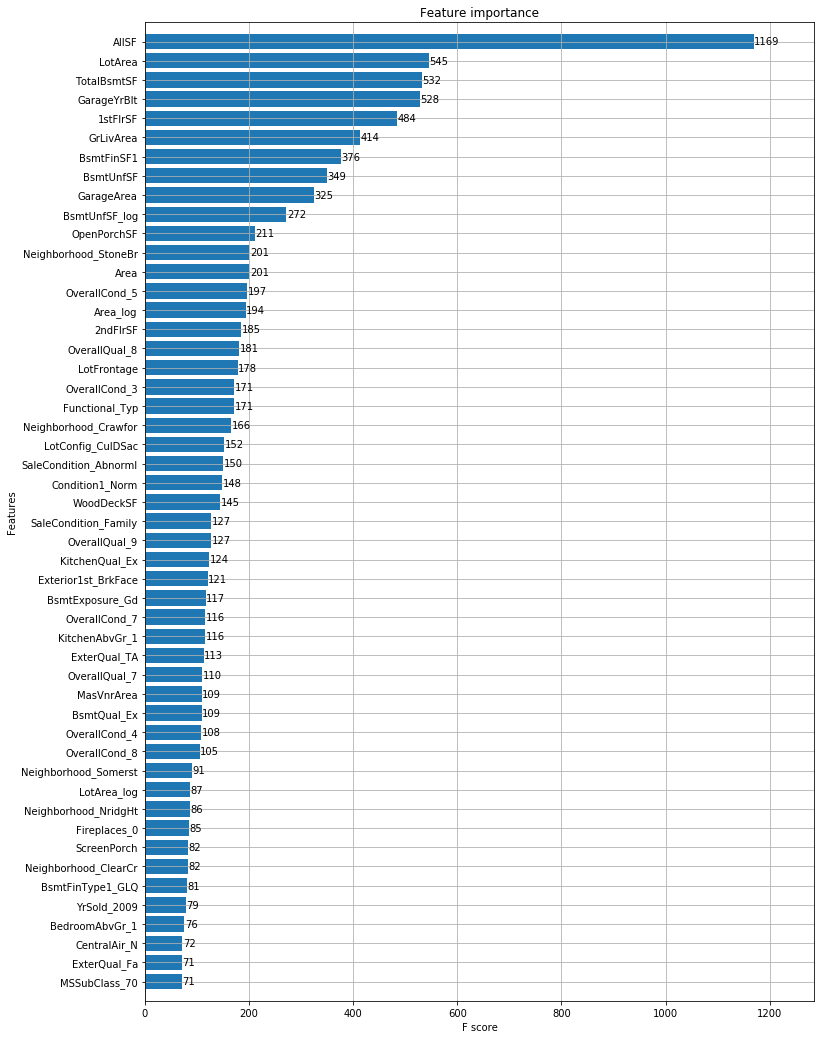

In [26]:
# plot the important features #
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(clf, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [27]:
sub.shape

(1459, 2)

In [28]:
clf.score(X_train, y_train)

AttributeError: 'Booster' object has no attribute 'score'

In [38]:
mean_absolute_error(x_train, clf.predict(y_train))

TypeError: ('Expecting data to be a DMatrix object, got: ', <class 'pandas.core.series.Series'>)